In [1]:
# Importing all rerquired libraries and dependency

import pandas as pd

In [2]:
# Loading Data in pandas DataFrame

bike_sharing_data = pd.read_csv('day.csv')

bike_sharing_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [8]:
# Dropping unnecessary columns

bike_sharing_data = bike_sharing_data.drop(['yr','instant', 'mnth','weekday','dteday','casual','registered'], axis=1, errors='ignore')

bike_sharing_data.head()

,season,holiday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,0,2,0.344167,0.363625,0.805833,0.160446,985
1,1,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,1,0,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,1,0,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,1,0,1,1,0.226957,0.229270,0.436957,0.186900,1600


In [9]:
# Converting Season column into One-Hot Encoding

bike_sharing_data['season'] = bike_sharing_data['season'].replace({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})

bike_sharing_data = pd.get_dummies(bike_sharing_data, columns=['season'], prefix='season')

bike_sharing_data.head()

,holiday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,season_fall,season_spring,season_summer,season_winter
0,0,0,2,0.344167,0.363625,0.805833,0.160446,985,0,1,0,0
1,0,0,2,0.363478,0.353739,0.696087,0.248539,801,0,1,0,0
2,0,1,1,0.196364,0.189405,0.437273,0.248309,1349,0,1,0,0
3,0,1,1,0.200000,0.212122,0.590435,0.160296,1562,0,1,0,0
4,0,1,1,0.226957,0.229270,0.436957,0.186900,1600,0,1,0,0


In [10]:
# Saving DataFrame as a CSV file

bike_sharing_data.to_csv('bike_sharing_data.csv', index=False)

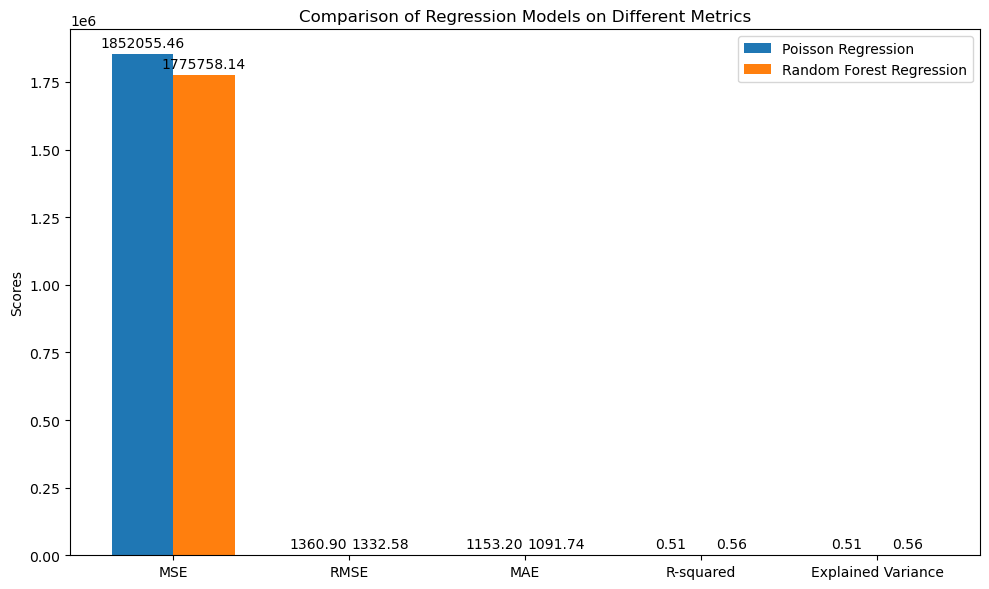

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Define the metrics for both models
metrics = ['MSE', 'RMSE', 'MAE', 'R-squared', 'Explained Variance']
poisson_values = [1852055.4621398125, 1360.9024440200747, 1153.1959722820134, 0.5058094351492075, 0.5058094351492861]
rf_values = [1775758.1363340137, 1332.575752568691, 1091.7387074829933, 0.5571545475562272, 0.5617695193012713]

# Plotting the bar chart
x = np.arange(len(metrics))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))

rects1 = ax.bar(x - width/2, poisson_values, width, label='Poisson Regression')
rects2 = ax.bar(x + width/2, rf_values, width, label='Random Forest Regression')

# Adding text labels and title
ax.set_ylabel('Scores')
ax.set_title('Comparison of Regression Models on Different Metrics')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Function to add value labels on top of the bars
def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(rects1)
add_labels(rects2)

fig.tight_layout()
plt.show()
